# Research Project  - Pt.2

## Implementing the Genetic Algorithm for Portfolio management

In [2]:
library(logopt)
library(matrixStats)
library(genalg)
library(ggplot2)
library(dplyr)
library(plotly)

In [3]:
data(nyse.cover.1962.1984)
x <- coredata(nyse.cover.1962.1984)

## Implementing the GA

A genetic algorithm is a heuristic optimization technique that can be applied to the Knapsack problem, which involves finding the combination of items that maximizes the total value while staying under a certain weight limit. The algorithm begins by creating an initial population of candidate solutions, which are evaluated using a fitness function that ensures the weight limit is not exceeded. The fittest individuals are selected to generate the next generation of candidate solutions using crossover and mutation operators. The process continues until a termination criterion is met, and the fittest individual in the final population is chosen as the optimal solution to the Knapsack problem.

In [5]:
min_weight <- function(DF){
  v <- c()
  for(i in 1:dim(DF)[2]){
    v <- c(v,sd(DF[,i]))
  }
  return(v)
}
format_sol <- function(x){
  v <- strsplit(strsplit(strsplit(x, ":")[[1]][2],'\n')[[1]][1],' ')
  v <- sapply(v, as.numeric)
  v <- v[!is.na(v)]
  return(v)
}


In [6]:
WEIGHT_LIMIT = 1

DAYS=1000#dim(x)[1]
HOW_OFTEN=80
HOW_FAR_BACK=60


ga.p <- function(dataframe=x,
                 df=x,
                 days=DAYS,
                 reb_freq=HOW_OFTEN,
                 how_far_back=HOW_FAR_BACK,
                 weightlimit=WEIGHT_LIMIT){
  
  fitness <- function(x) {
    current_solution_survivalpoints <- x %*% dataset$survivalpoints
    current_solution_weight <- x %*% dataset$weight
    
    if (current_solution_weight > weightlimit) 
      return(0) else return(-current_solution_survivalpoints)
  }
  
  NEW = c(paste(colnames(df),collapse=', '))
  
  w = rep(1, dim(df)[2]) / dim(df)[2]
  
  
  weightlimit <- WEIGHT_LIMIT#.03
  S <- 1
  time.df <- data.frame()
  
  for(i in 1:days){
    S <- c(S, w%*%df[i,]*tail(S,1))
    
    
    if(i%%reb_freq==0){
      print(i)
      dataset <- data.frame(item=colnames(dataframe),
                            survivalpoints = colProds(dataframe[(i-how_far_back):i,]),
                            weight= min_weight(dataframe[(i-how_far_back):i,]))
      
      
      GAmodel <- rbga.bin(size = dim(dataframe)[2], popSize = 200, iters = 100, mutationChance = 0.05, 
                          elitism = T, evalFunc = fitness)
      
      solution <- format_sol(summary(GAmodel, echo=FALSE))      
      
      if(sum(solution)>=2){
        df <- dataframe[,dataset[solution == 1, ]$item]
        w<- colProds(df[(i-how_far_back):i,])/sum(colProds(df[(i-how_far_back):i,]))
        
        
        
      }else{
        w<- colProds(df[(i-how_far_back):i,])/sum(colProds(df[(i-how_far_back):i,]))
        #P <- rbind(P, colnames(sol_dataframe))
        #W <- rbind(W, w)
      }
      #print(i)
      #print(tail(S,1))
      #print('===========================')
      #print('')
      print(colnames(df))
    }
    if(i>1){
      w<- colProds(df[(i-1):i,])/sum(colProds(df[(i-1):i,]))
    }
    
    NEW <- c(NEW,paste(colnames(df),collapse=', '))
    #print(colnames(df))
    #print(w)
  }
  DF <- data.frame(portfolio=S,stocks_in=NEW)
  return(DF)
  #print(length(NEW))
  #print(length(S))
}



[1] 20
[1] "gte"    "jnj"    "schlum"
[1] 40
[1] "espey" "gm"    "inger" "kimbc" "pandg" "tex"  
[1] 60
[1] "espey" "gm"    "inger" "kimbc" "pandg" "tex"  
[1] 80
[1] "dupont" "ford"  
[1] 100
[1] "ge"    "luken" "meico"
[1] 120
[1] "exxon" "pills"
[1] 140
[1] "ford" "hp"   "jnj"  "tex" 
[1] 160
[1] "dow"   "inger" "luken" "mobil"
[1] 180
[1] "kimbc" "pandg"
[1] 200
[1] "coke"  "espey" "mobil"
[1] 20
[1] "comme" "mobil"
[1] 40
[1] "comme" "mobil"
[1] 60
[1] "coke"  "ibm"   "kodak" "luken" "sears"
[1] 80
[1] "merck"  "schlum" "sears" 
[1] 100
[1] "kimbc" "merck"
[1] 120
[1] "alcoa" "kinar"
[1] 140
[1] "gte"    "hp"     "kinar"  "mmm"    "pandg"  "schlum"
[1] 160
[1] "gte"    "hp"     "kinar"  "mmm"    "pandg"  "schlum"
[1] 180
[1] "dow"   "ge"    "gulf"  "iroqu" "mobil"
[1] 200
[1] "dow"   "ge"    "gulf"  "iroqu" "mobil"
[1] 20
[1] "coke"  "exxon" "gm"   
[1] 40
[1] "dupont" "gm"     "mobil"  "tex"   
[1] 60
[1] "exxon" "meico" "mobil"
[1] 80
[1] "dupont" "merck" 
[1] 100
[1] "exxon" "i

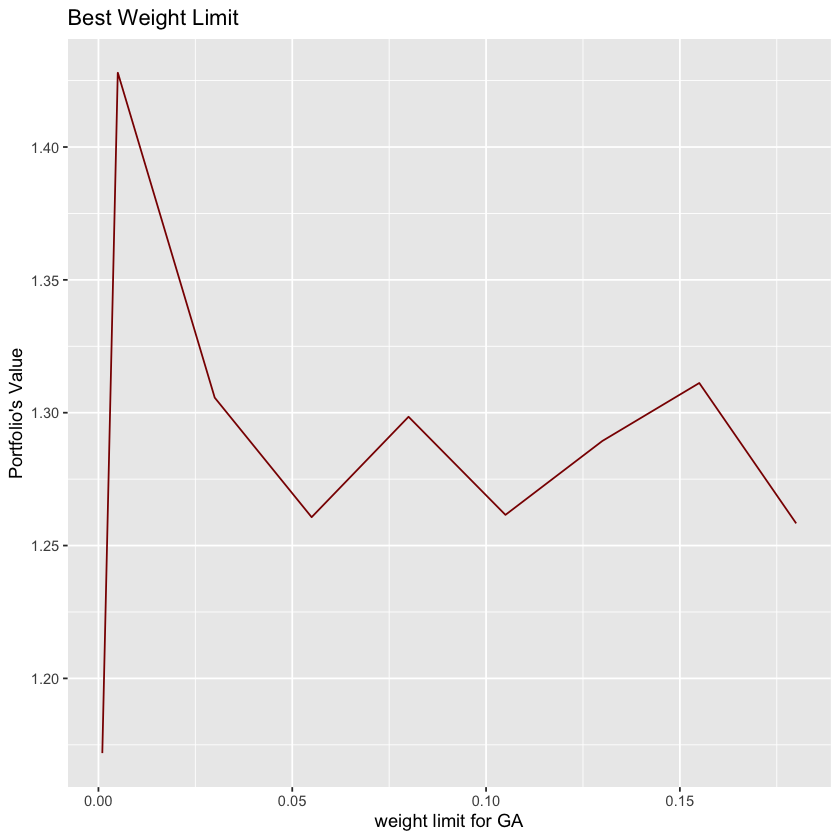

In [7]:

DAYS=200
HOW_OFTEN=20
HOW_FAR_BACK=14


x_ <- c(.001,seq(.005, .2, .025))
y <- c()

for(i in x_){
  WEIGHT_LIMIT = i
  gap <- tail(ga.p(df=x[,c('ahp', 'arco', 'kinar', 'kodak', 'merck')])$portfolio,1)
  y <- c(y, gap)
}


data <- data.frame(x=x_, y=y)

ggplot(data, aes(x=x)) + 
  geom_line(aes(y = y), color = "darkred") +
  ggtitle("Best Weight Limit") +
  labs(y = "Portfolio's Value", x = "weight limit for GA")

In [7]:

WEIGHT_LIMIT = .005
DAYS=200 
HOW_OFTEN=10
HOW_FAR_BACK=3


vs_u1 <- ga.p(df=x[,c('ahp', 'arco', 'kinar', 'kodak', 'merck')])
tail(vs_u1$portfolio)




u1 <- universal.cover(x[1:DAYS,c('ahp', 'arco', 'kinar', 'kodak', 'merck')],n=21)
u2 <- universal.cover(x[1:DAYS,c('jnj', 'pills', 'sherw')],n=21)
u3 <- universal.cover(x[1:DAYS,c("gm","iroqu")],n=21)
u4 <- universal.cover(x[1:DAYS,c("gm","tex")],n=21)

test <- x[1:DAYS,sample(1:dim(x)[2],5)]
test1 <- x[1:DAYS,sample(1:dim(x)[2],5)]
test2 <- x[1:DAYS,sample(1:dim(x)[2],5)]
ut <- universal.cover(test,n=21)
ut1 <- universal.cover(test1,n=21)
ut2 <- universal.cover(test2,n=21)

data <- data.frame(day=0:DAYS,
                   ga=vs_u1$portfolio,
                   u1=c(1,u1),
                   u2=c(1,u2),
                   ut=c(1,ut),
                   ut1=c(1,ut1),
                   ut2=c(1,ut2),
                   u3_=c(1,u3_),
                   u4_=c(1,u4_))

ggplot(data, aes(x=day)) + 
  geom_line(aes(y = ga), color = "darkred") + 
  geom_line(aes(y = u1), color="blue", linetype="twodash")+
  geom_line(aes(y = u2), color="steelblue", linetype="twodash")+
  geom_line(aes(y = ut), color="darkblue", linetype="twodash")+
  geom_line(aes(y = ut1), color="lightblue", linetype="twodash")+
  geom_line(aes(y = ut2), color="purple", linetype="twodash")+
  geom_line(aes(y = u3_), color="orange", linetype="longdash")+
  geom_line(aes(y = u4_), color="orange", linetype="longdash") +
  ggtitle("Comparison of Performances") +
  labs(y = "Portfolios ", x = "Days")




[1] 10
[1] "ahp"   "arco"  "kinar" "kodak" "merck"
[1] 20
[1] "iroqu" "sears"
[1] 30
[1] "gm"  "tex"
[1] 40
[1] "gm"  "tex"
[1] 50
[1] "gm"  "tex"
[1] 60
[1] "gm"  "tex"
[1] 70
[1] "gm"  "tex"
[1] 80
[1] "gm"  "tex"
[1] 90
[1] "gm"  "tex"
[1] 100
[1] "gm"  "tex"
[1] 110
[1] "gm"    "iroqu"
[1] 120
[1] "gm"    "iroqu"
[1] 130
[1] "gm"    "iroqu"
[1] 140
[1] "coke"  "ge"    "kinar"
[1] 150
[1] "coke"  "ge"    "kinar"
[1] 160
[1] "coke"  "ge"    "kinar"
[1] 170
[1] "kimbc" "tex"  
[1] 180
[1] "fisch" "iroqu"
[1] 190
[1] "dupont" "kodak" 
[1] 200
[1] "inger" "meico" "sears"


[1] 1.368137 1.365678 1.357323 1.365590 1.366994 1.364157

ERROR: Error in data.frame(day = 0:DAYS, ga = vs_u1$portfolio, u1 = c(1, u1), : oggetto 'u3_' non trovato
